<a href="https://colab.research.google.com/github/debangana97/GRIP-Feb-21/blob/main/EDA_on_Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Name- Debangana Mallick**
###GRIP-Sparks Foundation
###Data Science and Business Analytics
###Task- Exploratory Data Analysis on Sports data

In [25]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [26]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Looking at the two datasets

In [27]:
#reading the data from google drive
d_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/deliveries.csv')
d_data.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


In [28]:
m_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/matches.csv')
m_data.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


# **Exploratory Data Analysis**

In [29]:
d_data.isnull().sum().sort_values(ascending=False)

fielder             172630
player_dismissed    170244
dismissal_kind      170244
bowler                   0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
wide_runs                0
is_super_over            0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
match_id                 0
dtype: int64

There are missing values but these values makes sense which we will see later using data visualizations so no need to worry about these missing data.

In [30]:
print(d_data.shape)
print(m_data.shape)

(179078, 21)
(756, 18)


In [31]:
m_data.isnull().sum().sort_values(ascending=False)

umpire3            637
city                 7
player_of_match      4
winner               4
umpire1              2
umpire2              2
toss_winner          0
season               0
date                 0
team1                0
team2                0
result               0
toss_decision        0
dl_applied           0
win_by_runs          0
win_by_wickets       0
venue                0
id                   0
dtype: int64

In [32]:
#locating the missing the data
print(m_data.player_of_match[m_data.player_of_match != m_data.player_of_match].index.values)
print(m_data.winner[m_data.winner != m_data.winner].index.values)

[300 545 570 744]
[300 545 570 744]


In [33]:
display(m_data.iloc[300])
display(m_data.iloc[545])
display(m_data.iloc[570])
display(m_data.iloc[744])

id                              301
season                         2011
city                          Delhi
date                     2011-05-21
team1              Delhi Daredevils
team2                 Pune Warriors
toss_winner        Delhi Daredevils
toss_decision                   bat
result                    no result
dl_applied                        0
winner                          NaN
win_by_runs                       0
win_by_wickets                    0
player_of_match                 NaN
venue              Feroz Shah Kotla
umpire1                   SS Hazare
umpire2                   RJ Tucker
umpire3                         NaN
Name: 300, dtype: object

id                                         546
season                                    2015
city                                 Bangalore
date                                2015-04-29
team1              Royal Challengers Bangalore
team2                         Rajasthan Royals
toss_winner                   Rajasthan Royals
toss_decision                            field
result                               no result
dl_applied                                   0
winner                                     NaN
win_by_runs                                  0
win_by_wickets                               0
player_of_match                            NaN
venue                    M Chinnaswamy Stadium
umpire1                              JD Cloete
umpire2                              PG Pathak
umpire3                                    NaN
Name: 545, dtype: object

id                                         571
season                                    2015
city                                 Bangalore
date                                2015-05-17
team1                         Delhi Daredevils
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bangalore
toss_decision                            field
result                               no result
dl_applied                                   0
winner                                     NaN
win_by_runs                                  0
win_by_wickets                               0
player_of_match                            NaN
venue                    M Chinnaswamy Stadium
umpire1                        HDPK Dharmasena
umpire2                           K Srinivasan
umpire3                                    NaN
Name: 570, dtype: object

id                                       11340
season                                    2019
city                                 Bengaluru
date                                  30/04/19
team1              Royal Challengers Bangalore
team2                         Rajasthan Royals
toss_winner                   Rajasthan Royals
toss_decision                            field
result                               no result
dl_applied                                   0
winner                                     NaN
win_by_runs                                  0
win_by_wickets                               0
player_of_match                            NaN
venue                   M. Chinnaswamy Stadium
umpire1                            Nigel Llong
umpire2                           Ulhas Gandhe
umpire3                         Anil Chaudhary
Name: 744, dtype: object

These are the four matches which had no outcome so it is better to remove these four rows from the data because here it is not very logical to put an estimate.

In [34]:
#I manually removed the four rows from the actual data and then imported the data once more
#I was unable to do it in python so if any of you can suggest any method it would be really helpful
m_data_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/matches_updated - matches.csv')
print("After removing the 4 observations from the actual data, the new dimension of the data is:",m_data_new.shape)

After removing the 4 observations from the actual data, the new dimension of the data is: (752, 18)


In [35]:
#The missing positions in 'city'
m_data_new[m_data_new.city.isnull()][['city','venue']]

,city,venue
460,NaN,Dubai International Cricket Stadium
461,NaN,Dubai International Cricket Stadium
465,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
473,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium


Since the missing city names corresponds to a stadium in Dubai so it is meaningful to replace the missing values with 'Dubai'

In [36]:
#Filling the missing city with Dubai
m_data_new.city = m_data_new.city.fillna('Dubai')

In [37]:
#Considering the umpires to be unbiased we drop those columns
m_data_new=m_data_new.drop(columns=['umpire3', 'umpire2', 'umpire1'], axis=1)

In [38]:
m_data_new.isnull().sum().sort_values(ascending=False)

venue              0
player_of_match    0
win_by_wickets     0
win_by_runs        0
winner             0
dl_applied         0
result             0
toss_decision      0
toss_winner        0
team2              0
team1              0
date               0
city               0
season             0
id                 0
dtype: int64

No more missing values.

In [39]:
m_data_new['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [40]:
print(m_data_new['team1'].unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [78]:
print(m_data_new['city'].unique())

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Dubai'
 'Mohali' 'Bengaluru']


### **Data Visualization**

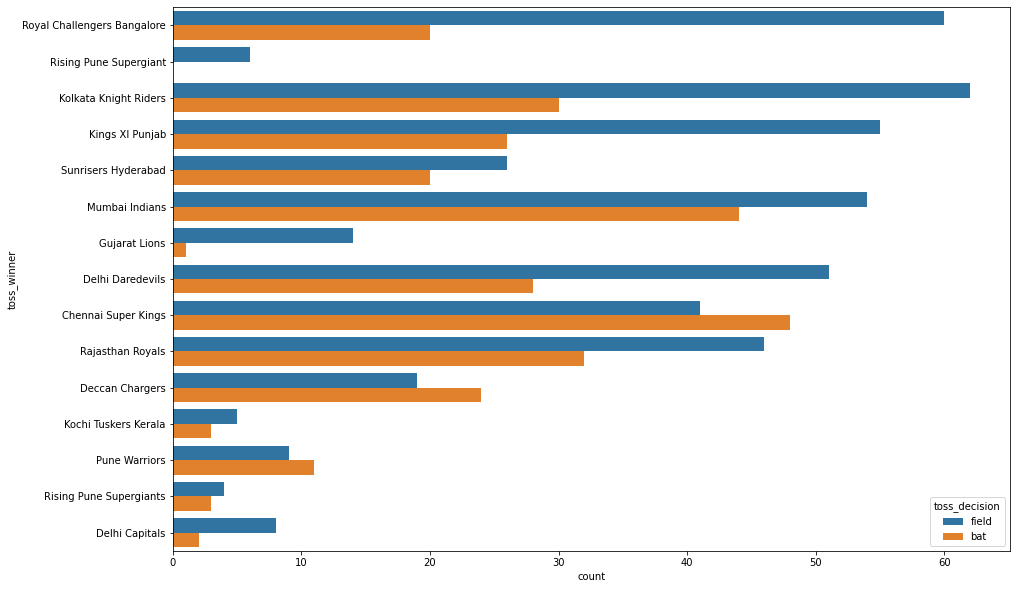

In [84]:
f, ax = plt.subplots(figsize=(15,10))
sns.countplot(y='toss_winner', hue='toss_decision', data=m_data_new)

**The graph entails-**

In majority of the matches when the teams won the toss they those to field first. 

Whereas in case of **Chennai Super Kings**, **Deccan Chargers** and **Pune Warriors** the opposite happened.

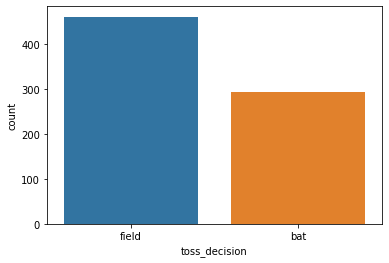

In [42]:
#Comparison between the two toss decisions
sns.countplot(x='toss_decision', data=m_data_new)

**Interpretation-**

Field was the most opted choice of the teams.

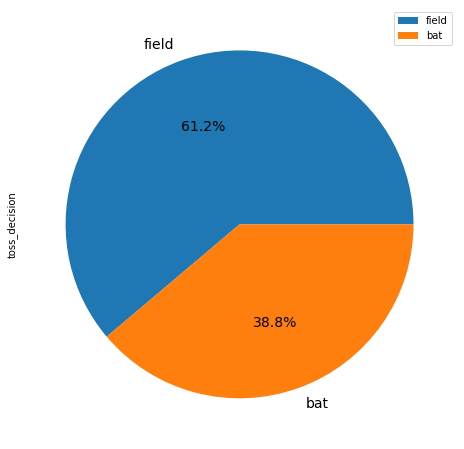

In [43]:
m_data_new['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', figsize=(8,8), legend=True)

**Interpretation-**

More than 61% of the times when teams chose to field first, resulted in victory!

(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 <a list of 8 Text major ticklabel objects>)

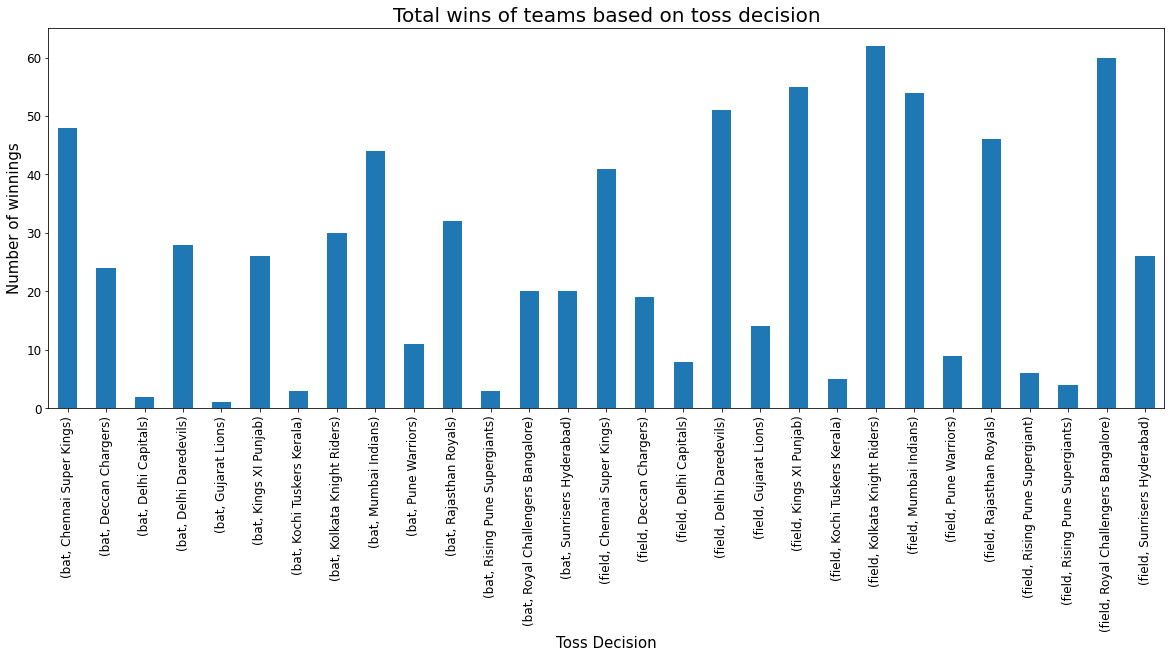

In [80]:
#Winning statistics of teams based on toss decision
var = m_data_new.groupby(['toss_decision','toss_winner'])['winner'].count()
var.plot(kind='bar', figsize=(20,7))
plt.title('Total wins of teams based on toss decision', fontsize=20)
plt.ylabel('Number of winnings', size = 15)
plt.xlabel('Toss Decision', size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

**Interpretations-**

Kolkata Knight Riders have won more matches when they chose to field first.

Chennai Super Kings have won more matches when they chose to bat first.

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

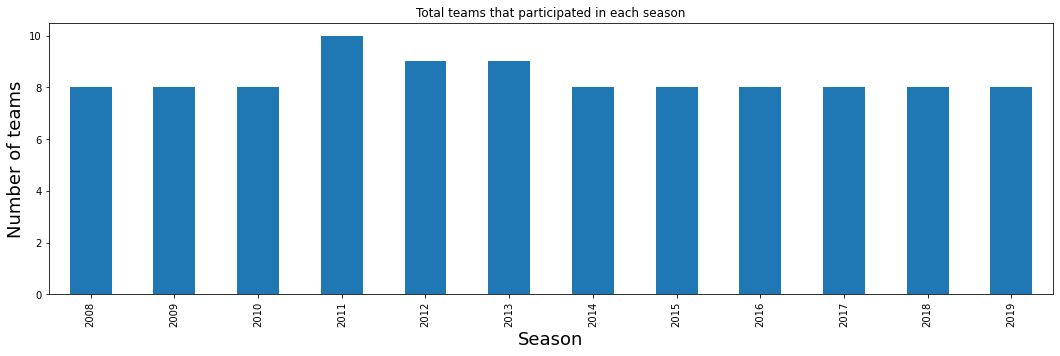

In [52]:
#Matches played in each season
m_data_new.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(18,5))
plt.title('Total teams that participated in each season')
plt.ylabel('Number of teams', size = 18)
plt.xlabel('Season', size = 18)
plt.xticks(size = 10)
plt.yticks(size = 10)

In 2011, 10 teams played which was the most number of teams that participated among all the years.

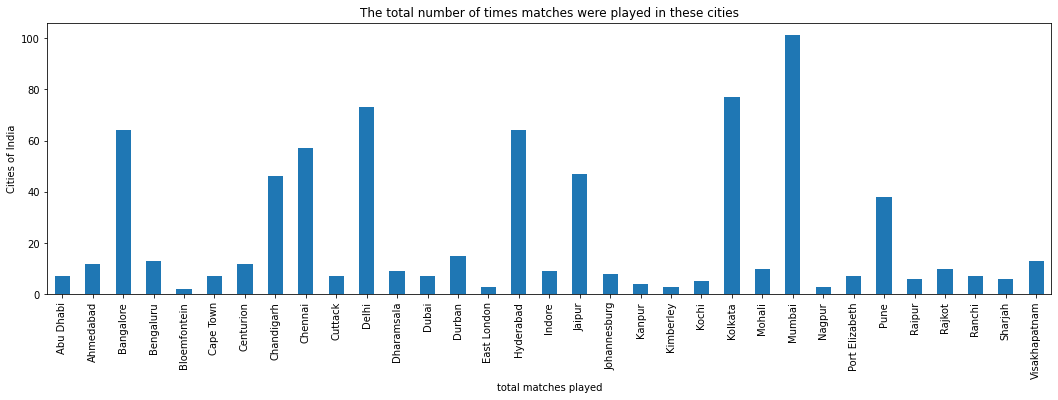

In [56]:
#Countplot of cities
f, ax = plt.subplots(figsize=(18,5))
m_data_new.groupby('city')['venue'].count().plot(kind='bar')
plt.title('The total number of times matches were played in these cities')
plt.ylabel('Cities of India')
plt.xlabel('total matches played')
plt.show()

The maximum number of matches was played in the stadium of Mumbai

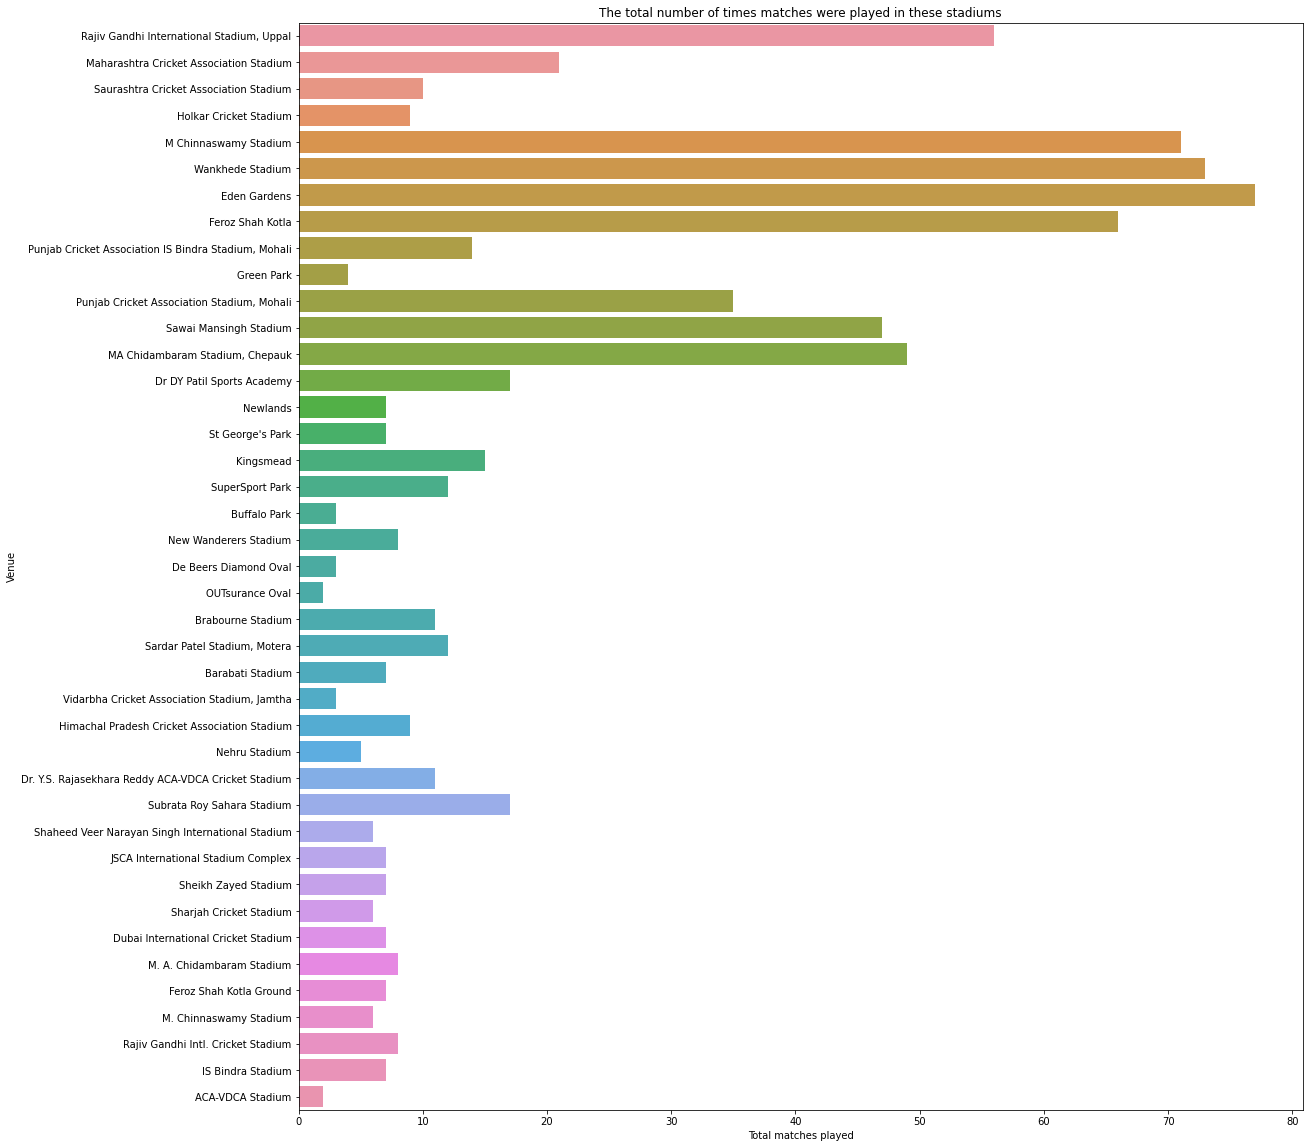

In [58]:
#Countplot of venues
f, ax = plt.subplots(figsize=(18,20))
sns.countplot(y='venue', data=m_data_new)
plt.title('The total number of times matches were played in these stadiums')
plt.ylabel('Venue')
plt.xlabel('Total matches played')
plt.show()

Eden Gardens has hosted the most number of matches in IPL

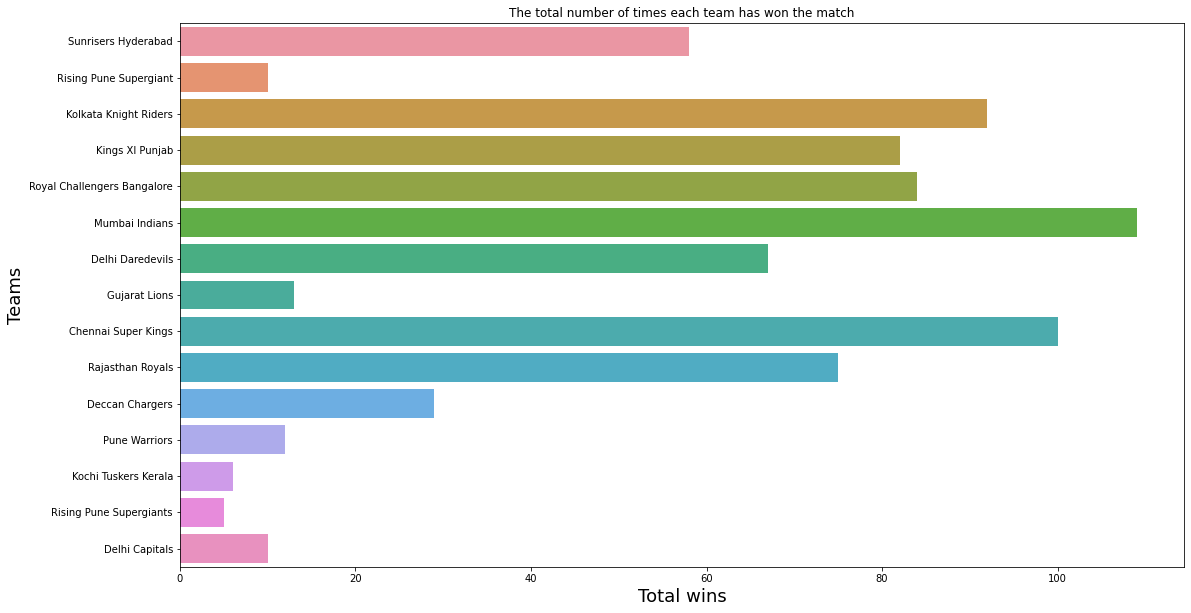

In [61]:
#Winning statistics of teams
f, ax = plt.subplots(figsize=(18,10))
sns.countplot(y='winner', data=m_data_new)
plt.title('The total number of times each team has won the match')
plt.ylabel('Teams', size=18)
plt.xlabel('Total wins', size=18)
plt.show()

**Interpretation-**
Mumbai Indians is the most winning team and then comes Chennai Super Kings.

Rising Pune Supergiants needs to improve a lot!

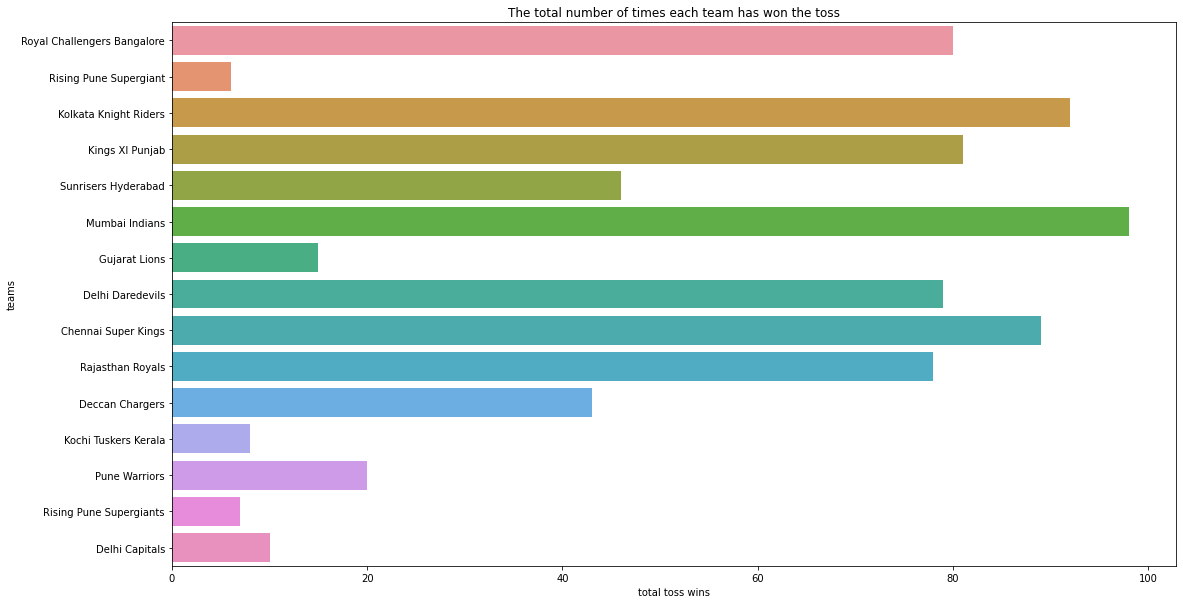

In [62]:
#Toss winning statistics of teams
f, ax = plt.subplots(figsize=(18,10))
sns.countplot(y='toss_winner', data=m_data_new)
plt.title('The total number of times each team has won the toss')
plt.ylabel('teams')
plt.xlabel('total toss wins')
plt.show()

**Interpretation-**

Mumbai Indians got very lucky with the tossing coin winning almost 100 tosses !

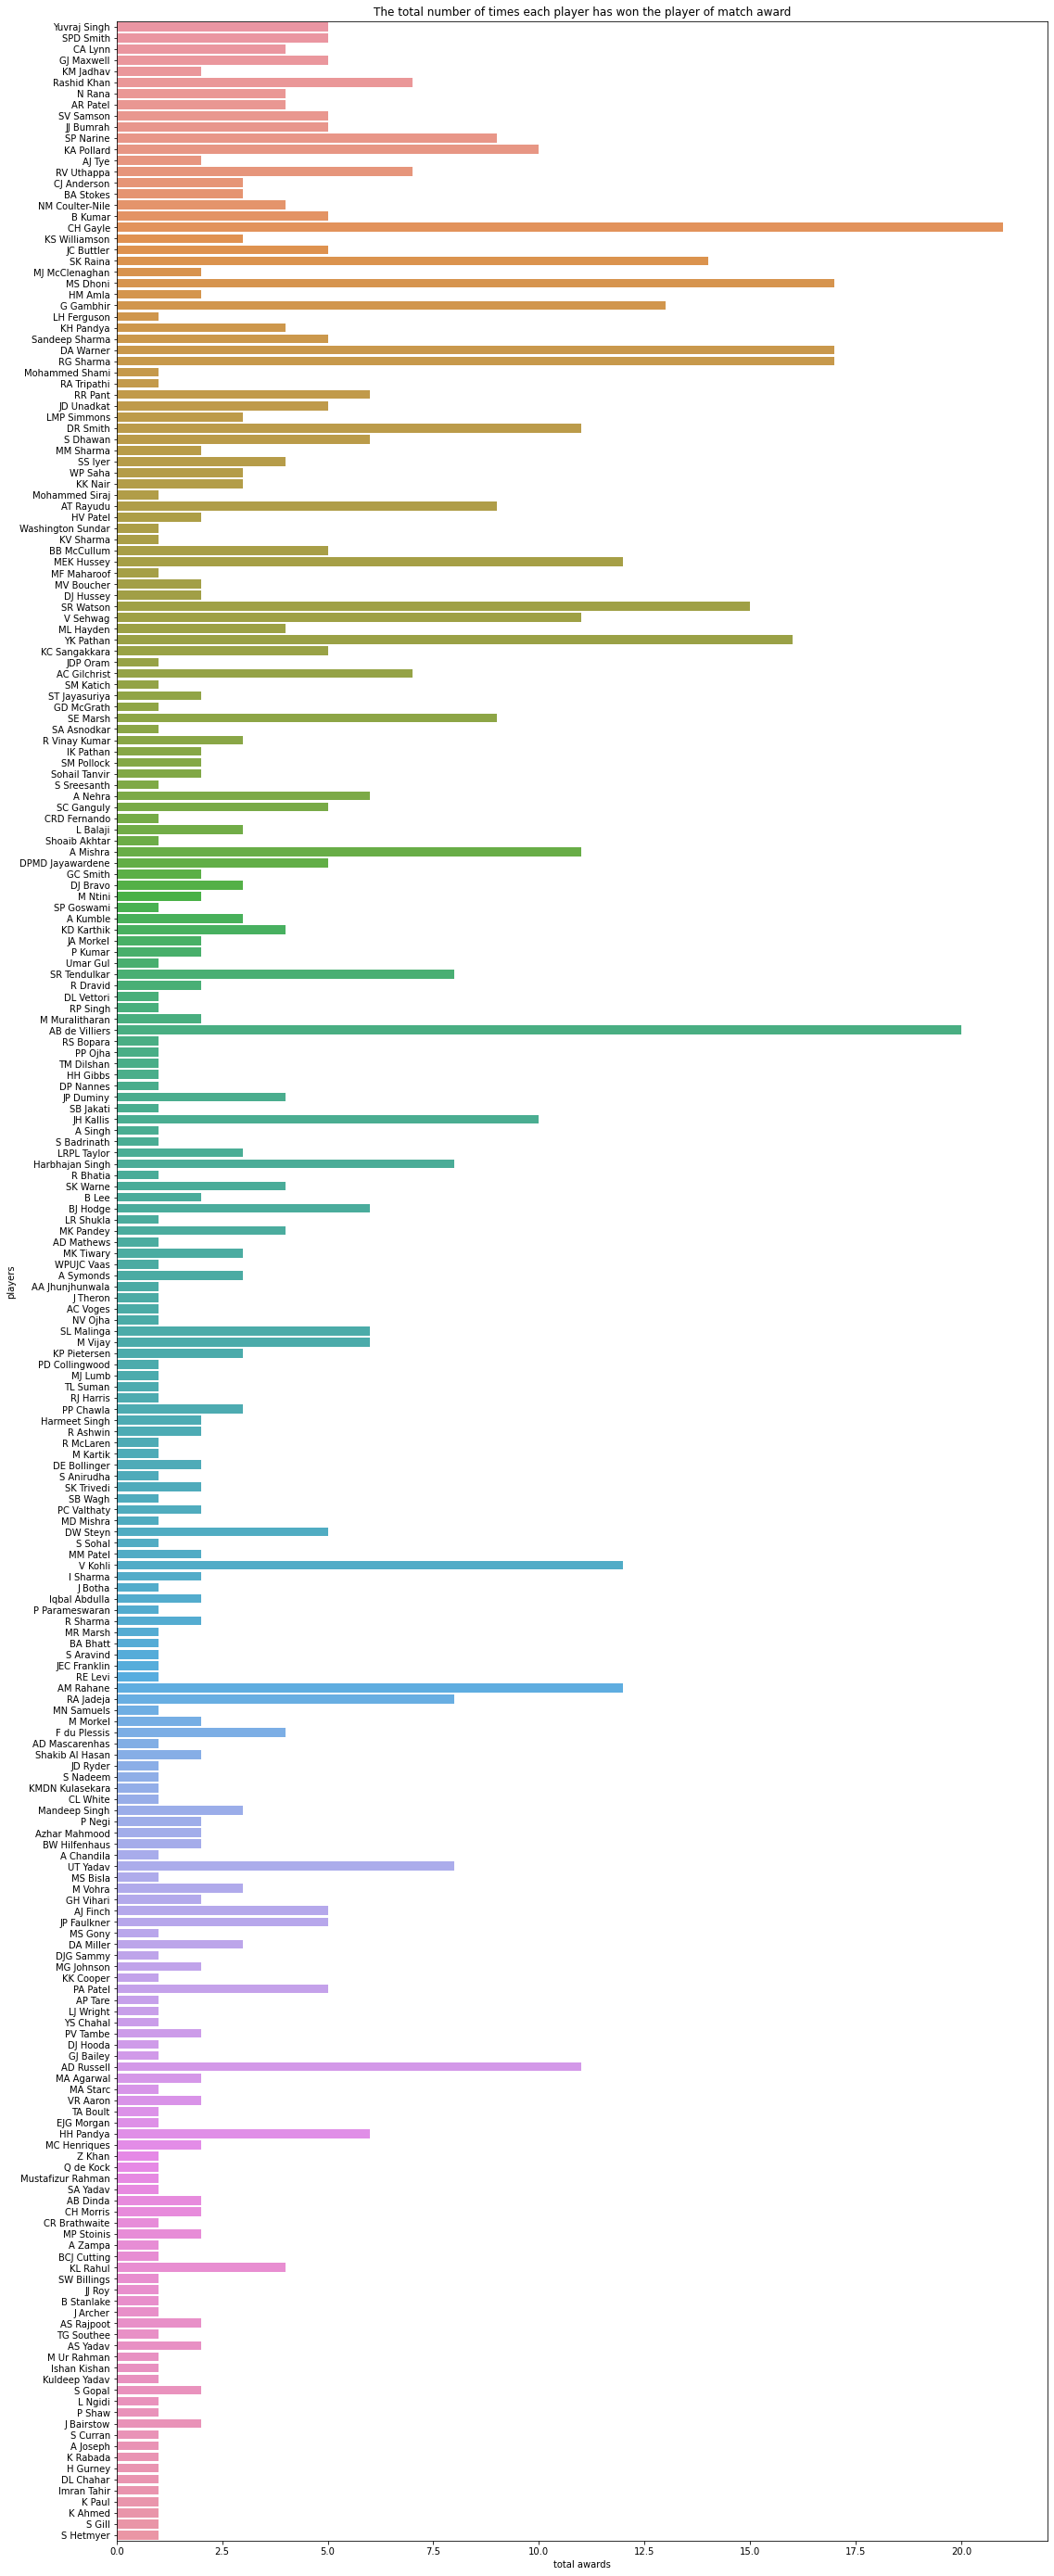

In [63]:
#Man of the match award won by each player
f, ax = plt.subplots(figsize=(18,50))
sns.countplot(y='player_of_match', data=m_data_new)
plt.title('The total number of times each player has won the player of match award')
plt.ylabel('players')
plt.xlabel('total awards')
plt.show()

**Interpretation-**
CH Gayle and AB de Villiers have won the player of match awards the most number of times.

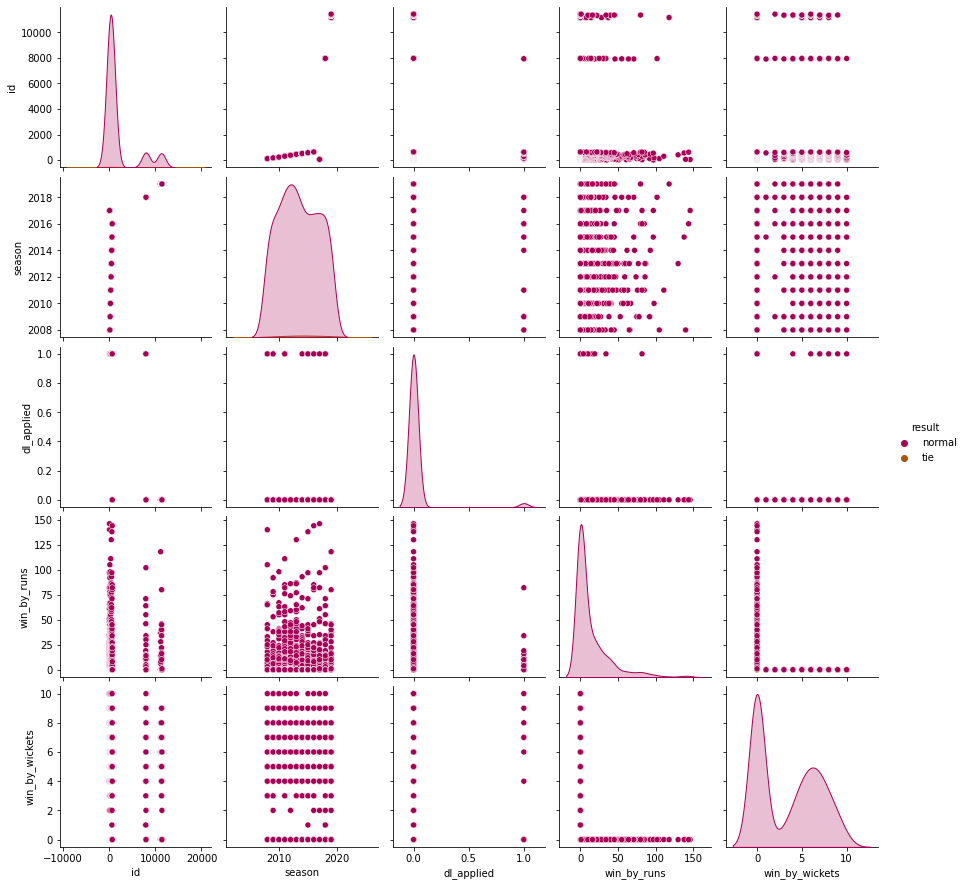

In [64]:
sns.pairplot(m_data_new, hue='result', palette='brg')
plt.show()

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 <a list of 8 Text major ticklabel objects>)

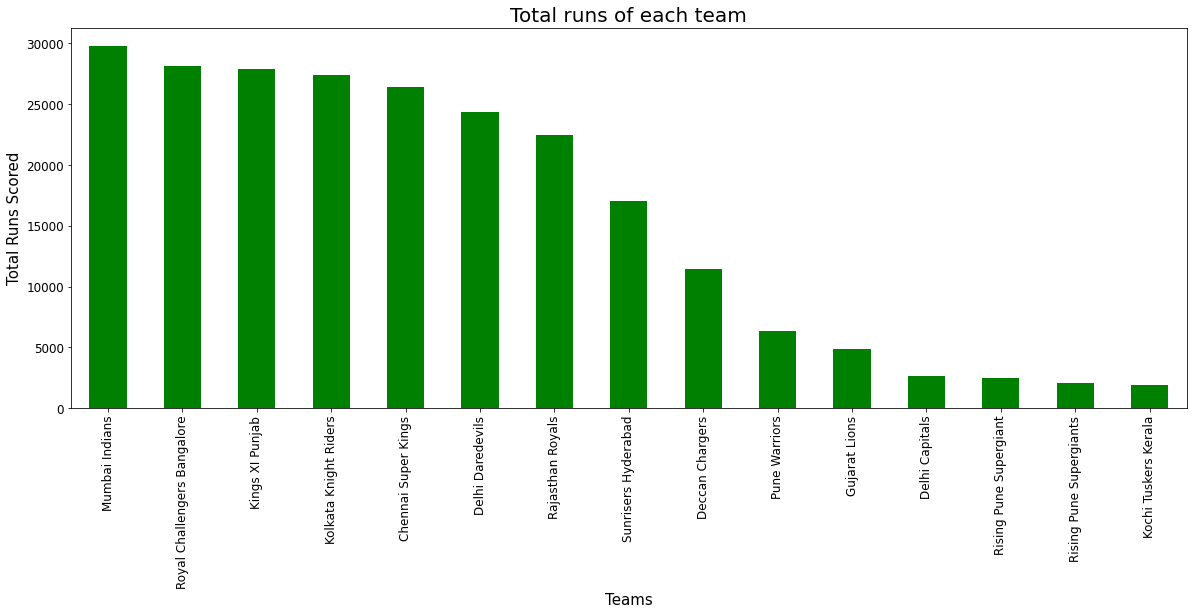

In [65]:
#calculating the total runs of each team
d_data.groupby('batting_team')['total_runs'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize =(20,7),color = 'green')
plt.title("Total runs of each team",fontsize= 20)
plt.xlabel("Teams", size = 15)
plt.ylabel("Total Runs Scored", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

**Interpretation-**

Combining all the seasons, Mumbai Indians seem to be a very strong team making almost 30000 runs!

But poor Kochi Tuskers Kerela, they were the least run scoring team with a little over 1000 runs.

The highest runs is scored by-


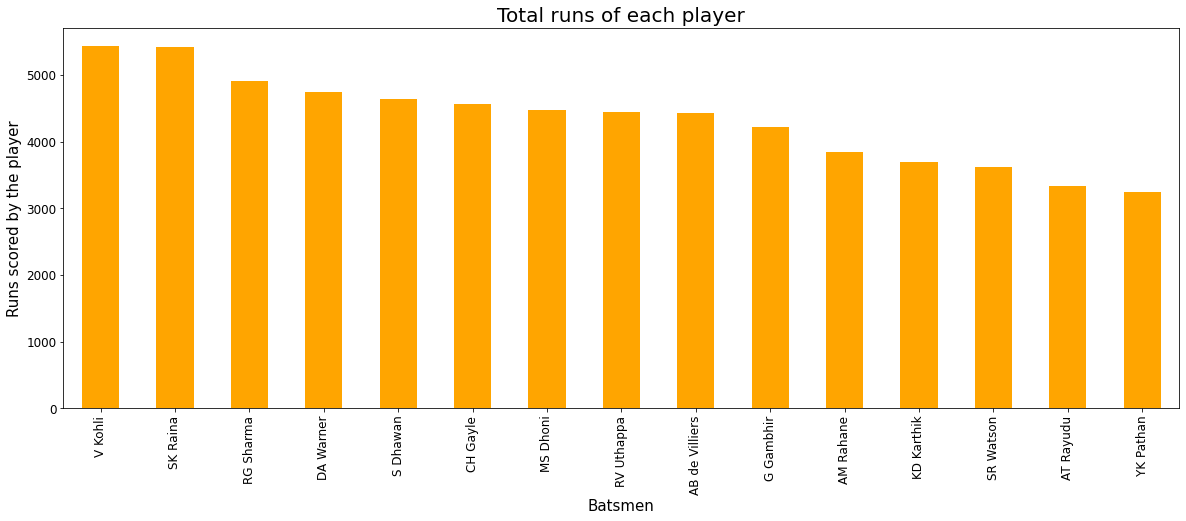

In [66]:
#calculating the total runs of each player
d_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(15).plot(kind = 'bar', figsize =(20,7),color = 'orange')
plt.title("Total runs of each player",fontsize= 20)
plt.xlabel("Batsmen", size = 15)
plt.ylabel("Runs scored by the player", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
print("The highest runs is scored by-")

**Interpretation-**

V Kohli has secured the first the position in gaining the most runs, contributing to a total of over 5000 runs!

However, SK Raina is also not very far behind!

The lowest runs is scored by-


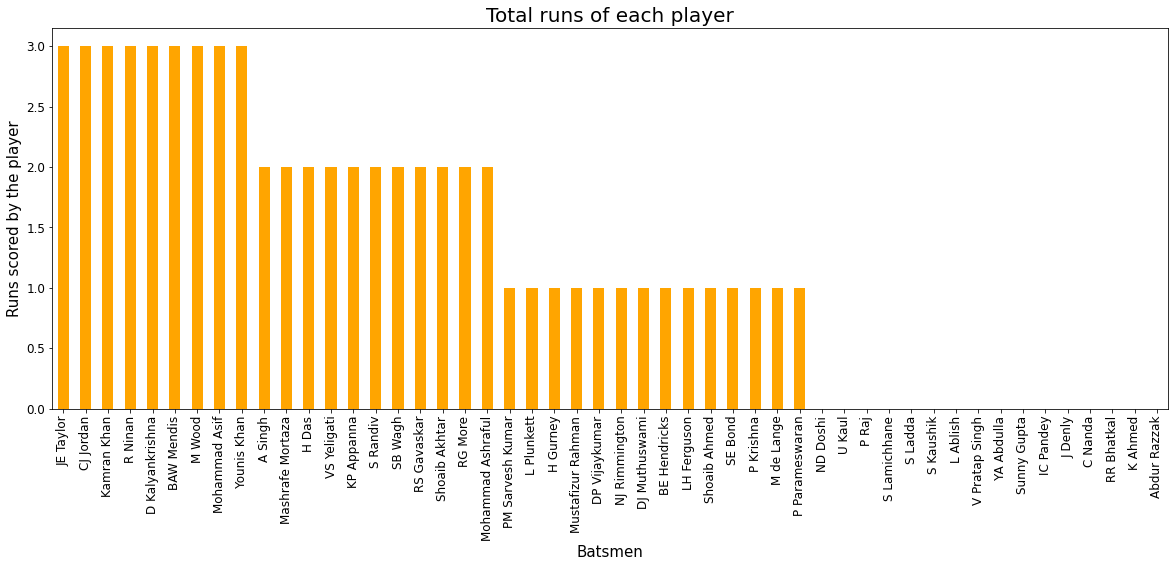

In [67]:
d_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).tail(50).plot(kind = 'bar', figsize =(20,7),color = 'orange')
plt.title("Total runs of each player",fontsize= 20)
plt.xlabel("Batsmen", size = 15)
plt.ylabel("Runs scored by the player", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
print("The lowest runs is scored by-")

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

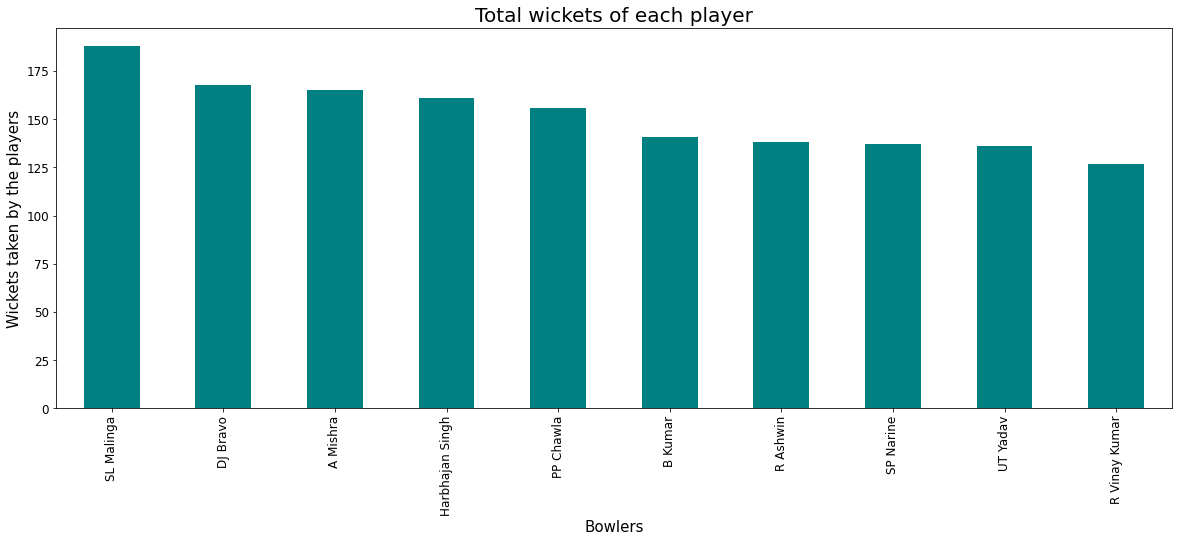

In [68]:
#calculating the total wickets taken by each player
tw = d_data.groupby('bowler')['player_dismissed'].value_counts()
tw.groupby('bowler').sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20,7), color='teal')
plt.title("Total wickets of each player",fontsize= 20)
plt.xlabel("Bowlers", size = 15)
plt.ylabel("Wickets taken by the players", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)

**Interpretation-**

Over the 12 seasons, the maximum number of wickets was taken by SL Malinga, making over 175 batsmen to go back to the pavillion!

In [69]:
#Combining the two datasets
combine = pd.merge(d_data,m_data_new, left_on='match_id', right_on ='id')
combine.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text major ticklabel objects>)

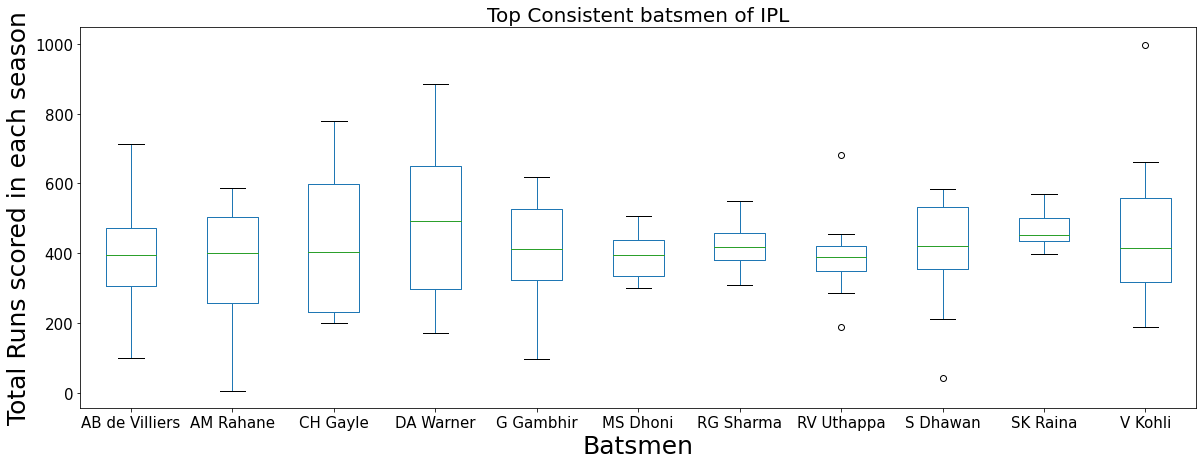

In [83]:
consistent = combine[combine.batsman.isin(['V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan', 'CH Gayle', 'MS Dhoni', 'RV Uthappa', 'AB de Villiers', 'G Gambhir', 'AM Rahane', 'KD Kartik'])][['batsman','season','total_runs']]
consistent.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (20,7))

plt.title("Top Consistent batsmen of IPL", fontsize = 20)
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs scored in each season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

**Interpretation-**

DA Warner has the highest median run scored

RV Uthappa and S Dhawan has not maintained their consistency. Their boxplots show the presence of outliers

AB de Villiers, RG Sharma and V Kohli have been the most consistent players in the seasons

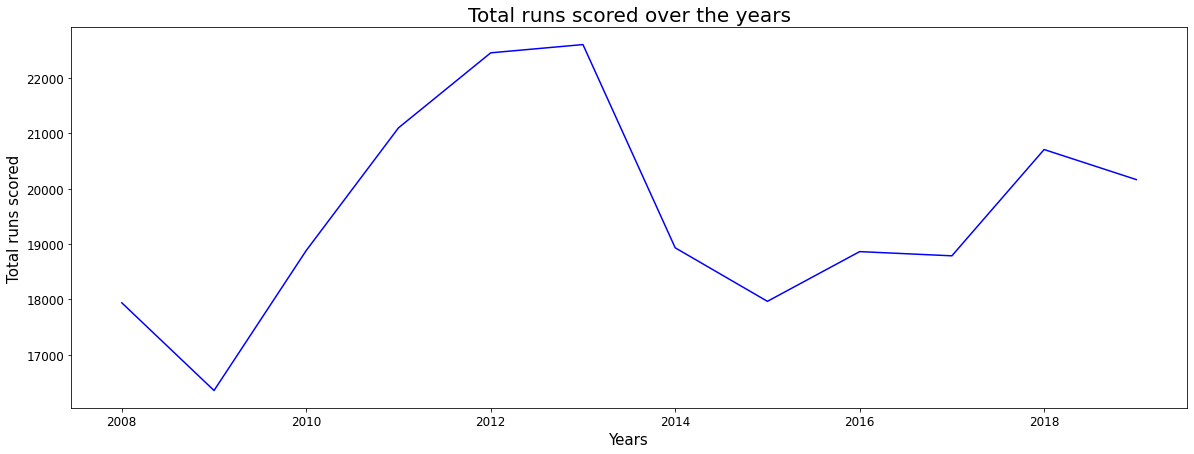

In [70]:
#Plotting the growth of total runs scored over the years
combine.groupby('season')['total_runs'].sum().plot(kind='line', figsize=(20,7), color='blue')

plt.title("Total runs scored over the years",fontsize= 20)
plt.xlabel('Years', size = 15)
plt.ylabel("Total runs scored", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

**Interpretation-**

The maximum runs was recorded in the year 2013 and there is a general increasing trend over the years which means either the batsmen have improved or the bowlers are lacking in performance..

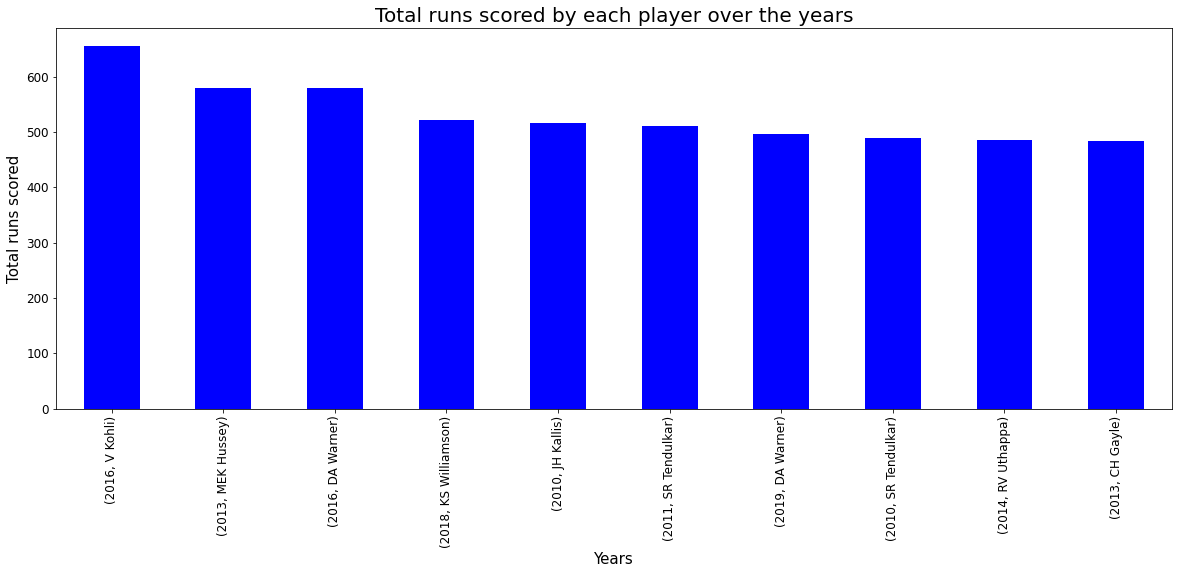

In [71]:
#Plotting the maximum runs scored by which player and in which season
var=combine.groupby(['season','batsman'])['batsman_runs'].value_counts()
var.groupby(['season','batsman']).sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20,7), color='blue')

plt.title("Total runs scored by each player over the years",fontsize= 20)
plt.xlabel('Years', size = 15)
plt.ylabel("Total runs scored", size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

**Interpretation-**

The graph indicates that the maximum number of runs was scored in 2016 by V Kohli. 

Text(0, 0.5, 'Count')

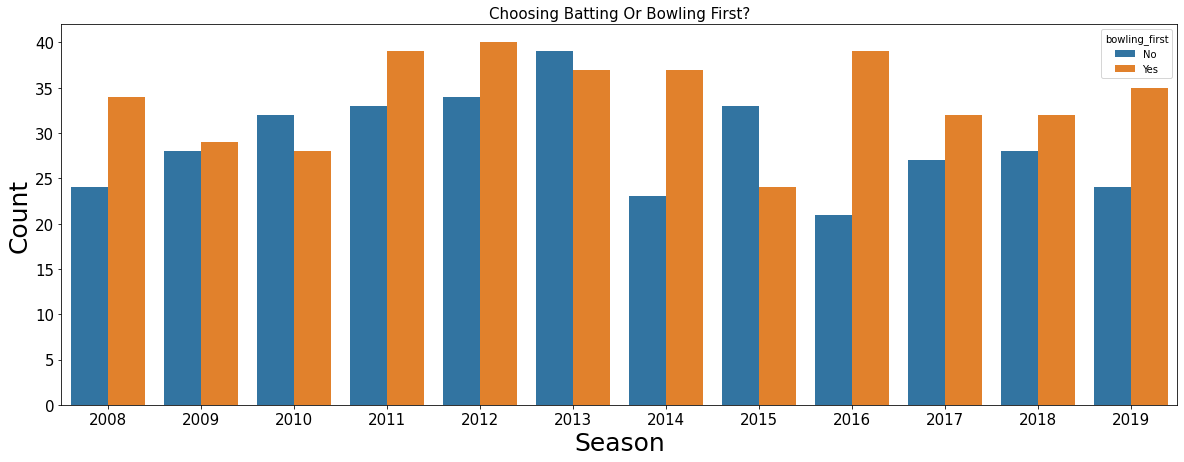

In [82]:
#Creating a feature where the team choose bowling/fielding first and won
m_data_new['bowling_first'] = np.where((m_data_new.win_by_wickets > 0), 'Yes', 'No')

plt.figure(figsize = (20,7))
sns.countplot(x='season', data = m_data_new, hue = 'bowling_first')
plt.title("Choosing Batting Or Bowling First?", fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Season", fontsize = 25)
plt.ylabel("Count", fontsize = 25)

**Interpretation-**

Except for the years 2010 and 2013, in all the other seasons fielding first led the team to a victory.

### ***As a Sports analyst here are some of the Conclusions from the analysis-***

1. The Indian Premier League was played over 12 seasons with 15 teams. The matches were hosted by 33 cities all over India.

3. Majority of the teams who won the toss chose to field first.

4. The decision made at the toss was a key factor in determining the win or loss of a team.

5. **Mumbai Indians** was the most winning team considering all the 12 seasons together.

5. **Kolkata Knight Riders** won more matches when they chose to field first while **Chennai Super Kings** won more matches when they chose to bat first.

7. Mumbai was the top city in hosting the most number of matches as it has more than one stadium, while Eden Gardens, Kolkata alone was the top stadium where a largest number of matches were played.

8. **CH Gayle** and **AB de Villiers** were the top players recieving the player of the match award.

9. **Mumbai Indians** was the top scoring team in terms of runs reaching to almost 30000 runs in 12 seasons.

10. The most runs were scored by **V Kohli** and **SK Raina** and the most wickets were taken by **SL Malinga**

11. **AB de Villiers, RG Sharma** and **V Kohli** have been the most consistent players in the seasons

12. The **maximum runs** was recorded in **2016** by **V Kohli**

13. **Fielding first** assisted the teams in gaining victory.